# Анализ результатов А/В-теста для увеличения выручки интернет-магазина 

**Цель проекта:** Отделом маркетинга крупного интернет-магазина составлен список гипотез для увеличения выручки.\
Необходимо приоритизировать гипотезы и проанализировать результаты А/В-тестирования. 
    
**Задачи проекта:**
1. Применить фреймворк ICE для приоритизации гипотез, и отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез, и отсортировать их по убыванию приоритета.
3. Построить график кумулятивной выручки по группам, сделать выводы и предположения.
4. Построить график кумулятивного среднего чека по группам, сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего чека группы B к группе A, сделать выводы и предположения.
6. Построить график кумулятивного среднего количества заказов на посетителя по группам, сделать выводы и предположения.
7. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, сделать выводы и предположения.
8. Выявить аномалии в данных. Построить точечные графики количества заказов по пользователям и стоимостей заказов. Расчитать 95 -й и 99-й перцентили количества заказов на пользователя и стоимости заказа. Выбрать границу для определения аномальных пользователей.
9. Рассчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным, сделать выводы и предположения.
9. Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным, сделать выводы и предположения.
10. Рассчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, сделать выводы и предположения.
11. Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным, сделать выводы и предположения.
12. Проанализировать результаты тестирования и принять решение. 

**Данные:** Для анализа взяты:
1. Список из 9 гипотез по увеличению выручки интернет-магазина (файл 'hypothesis.csv')
2. Данные о заказах интернет-магазина за август 2019 года (файл 'orders.csv')
3. Данные о посещении сайта интернет-магазина за август 2019 года (файл 'visitors.csv')

**Этапы проекта:**
1. [Обзор и предобработка данных](#part1)
2. [Приоритизация гипотез](#part2)
3. [Анализ результатов A/B-теста](#part3)\
   3.1. [Графики кумулятивных метрик](#part4)\
   3.2. [Анализ аномальных значений](#part5)\
   3.3. [Расчет статистической значимости между группами по "сырым" данным](#part6)\
   3.4. [Расчет статистической значимости между группами по "очищенным" данным](#part7)
4. [Выводы и  рекомендации](#part8)

<a id="part1"></a>

## Обзор и предобработка данных

In [1]:
# Библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import scipy.stats as stats

In [2]:
# Изучим гипотезы по увеличению выручки
hypothesis = pd.read_csv('C:/Users/anita/datasets/Анализ результатов АВ теста/hypothesis.csv')
pd.set_option('max_colwidth', 120)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Изучим типы данных в датафрейме
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В файле представлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort (для оценки каждого параметра применена 10-бальная шкала): Reach — охват пользователей, Impact — влияние на пользователей, Confidence — уверенность в гипотезе; Efforts — затраты ресурсов на проверку гипотезы (чем больше значение, тем дороже проверка гипотезы).

Все типы данных указаны корректно. 

In [4]:
# Данные по заказам пользователей
orders = pd.read_csv('C:/Users/anita/datasets/Анализ результатов АВ теста/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
# Изучим типы данных в датафрейме
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Значения в столбце с датой заказа имеют тип данных object, переведем этот столбец в формат datetime.

In [6]:
# Исправим тип данных для значений в столбце с датой заказа
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [7]:
# Проверим данные на наличие дубликатов
orders[orders.duplicated(['visitorId','transactionId'])]

,transactionId,visitorId,date,revenue,group


Полных дубликатов в наших данных нет.

Поскольку в проекте нам нужно принять решение о результатах А/В-теста, проверим также распределение пользователей по группам: нет ли пользователей, которые попали сразу и в группу А, и в группу B. 

In [8]:
# Проверим наличие пользователей, которые попали сразу в обе группы
print('Количество пользователей, попавших и в группу А, и в группу В:', 
       len(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group>1')))

Количество пользователей, попавших и в группу А, и в группу В: 58


Таким образом, мы видим, что система распределения пользователей по тестовым группам работает с ошибками - сразу 58 посетителей отнесены как в группу А, так и в группу B. 
Таких пользователей стоило бы удалить, но данном проекте мы оставим распределение как есть, т.к. удаление такой ошибки в таком случае также нужно провести и в файле с посещениями сайта, а в данном проекте мы можем удалить их только из таблицы с заказами. 

In [9]:
# Данные по посещению сайта
visitors = pd.read_csv('C:/Users/anita/datasets/Анализ результатов АВ теста/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
# Изучим типы данных в датафрейме
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
# Проверим данные на наличие дубликатов
visitors.duplicated().sum()

0

Значения в столбце с датой также имеют тип данных object, переведем этот столбец в формат datetime.

In [12]:
# Исправим тип данных для значений в столбце с датой
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

**Вывод:** В данном разделе мы изучили информацию о имеющихся данных.
1. В файле с гипотезами от отдела маркетинга представлено 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort (для оценки каждого параметра применена 10-бальная шкала). Все типы данных в файле корректны. 
2. В датафреймах с заказами пользователей и посещением сайта мы исправили тип данных в столбцах с датой с object на datetime.
3. Дубликаты в данных отсутствуют. 
4. Важно отметить, что **система распределения пользователей по тестовым группам работает с ошибками - сразу 58 посетителей отнесены как в группу А, так и в группу B.** В данном проекте мы оставим распределение как есть, т.к. удаление такой ошибки в таком случае также нужно провести и в файле с посещениями сайта (а в нем данные сгруппированы по дням и id посетителей отсутствуют).

<a id="part2"></a>

## Приоритизация гипотез

In [13]:
# Изучим еще раз все имеющиеся гипотезы
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для приоритизации гипотез используем фреймворки ICE и RICE. 

Для каждой из 9 гипотез уже указаны все нужные для этого параметры по 10-бальной шкале:
- Reach — охват пользователей;
- Impact — влияние на пользователей;
- Confidence — уверенность в гипотезе;
- Efforts — затраты ресурсов на проверку гипотезы, чем больше значение Efforts, тем дороже проверка гипотезы.

In [14]:
# Применим фреймворк ICE для приоритизации гипотез и добавим новый столбец в таблицу
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).round(2)
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Вывод:** По методу ICE наивысшие приоритеты у гипотезы 8 "Запустить акцию, дающую скидку на товар в день рождения" и гипотезы 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Данные гипотезы  имеют самые высокие значения показателей влияния и уверенности (8-10 баллов), при этом затраты на их проверку средние (5-6 баллов).

Однако приоритетизация гипотез способом ICE не учитывает такой важный показатель как охват пользователей, для этого проведем расчет по методу RICE. 

In [15]:
# Применим фреймворк RICE для приоритизации гипотез и добавим новый столбец в таблицу
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
display(hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**
**С учетом охвата пользователей в первую очередь необходимо проверить гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", это внедрение затронет абсолютно всех пользователей и имеет сильное сильное влияние (7 баллов). По методу ICE у данной гипотезы также был высокий приоритет (она входила в ТОП-3).**

2ой приоритет у гипотезы 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". У данной гипотезы также высокий охват, при этом она достаточно проста в исполнении (Efforts - 3 балла). 

Наименьшим приоритетом как по методу ICE, так и по методу RICE обладает гипотеза 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей". Несмотря на низкие затраты для ее реализации, ожидается, что это изменение затронет не так много пользователей и мало окажет влияния на них. 

In [16]:
# Проранжируем результаты приоритезации каждого методом и выведем итоговую таблицу для наглядности
hypothesis['rank_ICE'] = hypothesis['ICE'].rank(ascending=False, method='dense')
hypothesis['rank_RICE'] = hypothesis['RICE'].rank(ascending=False, method='dense')
hypothesis[['Hypothesis','rank_ICE','rank_RICE']].sort_values(by='rank_RICE')

,Hypothesis,rank_ICE,rank_RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",3.0,1.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5.0,2.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",2.0,3.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",4.0,3.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1.0,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.0,5.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",6.0,6.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",7.0,6.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9.0,7.0


Мы проранжировали результаты приоритизации каждым методом и отсортировали таблицу в порядке возрастания приоритета, полученным методом RICE, поскольку он охватывает все важные показатели. 

В итоговой таблице наглядно видно, что гипотеза "Запустить акцию, дающую скидку на товар в день рождения", получившая высший приоритет по методу ICE, по методу RICE только на 4ом месте за счет низкого охвата пользователей. И, напротив, гипотеза "Добавить блоки рекомендаций товаров на сайт интернет-магазина" за счет большого охвата аудитории по методу RICE имеет 2ой приоритет, в то время как по методу ICE только 5ый. 

В первую очередь необходимо проверить гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

<a id="part3"></a>

## Анализ результатов A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах с данными по посещению сайта и заказов пользователей за август 2019 года. 

<a id="part4"></a>

### Графики кумулятивных метрик

Соберем в отдельные переменные daily_A и daily_B все важные для анализа показатели (за каждый день и накопленным итогом) для групп А и B. 

In [17]:
# Подготовим таблицу с показателям для группы А

# Сгруппируем датафрейм orders по дате и рассчитаем сумму выручки, кол-во заказов и покупателей, средний чек для каждого дня
daily_A = (
           orders[orders['group']=='A'][['date','revenue','transactionId','visitorId']]
                  .groupby('date', as_index=False)
                  .agg({'revenue':'sum','transactionId':pd.Series.nunique,'visitorId':pd.Series.nunique})
)

# Посчитаем выручку, кол-во заказов и покупателей, средний чек накопленным итогом
daily_A['revenue_cum'] = daily_A['revenue'].cumsum()
daily_A['orders_cum'] = daily_A['transactionId'].cumsum()
daily_A['clients_cum'] = daily_A['visitorId'].cumsum()
daily_A['avg_check_cum'] = daily_A['revenue_cum']/daily_A['orders_cum']

# Переименуем столбцы
daily_A = daily_A.rename(columns={'revenue':'revenue_day', 'transactionId':'orders_day','visitorId':'clients_day'})

In [18]:
# Подготовим таблицу с показателям для группы B

# Сгруппируем датафрейм orders по дате и рассчитаем сумму выручки, кол-во заказов и покупателей, средний чек для каждого дня
daily_B = (
           orders[orders['group']=='B'][['date','revenue','transactionId','visitorId']]
                  .groupby('date', as_index=False)
                  .agg({'revenue':'sum','transactionId':pd.Series.nunique,'visitorId':pd.Series.nunique})
)

# Посчитаем выручку, кол-во заказов и кол-во покупателей накопленным итогом
daily_B['revenue_cum'] = daily_B['revenue'].cumsum()
daily_B['orders_cum'] = daily_B['transactionId'].cumsum()
daily_B['clients_cum'] = daily_B['visitorId'].cumsum()
daily_B['avg_check_cum'] = daily_B['revenue_cum']/daily_B['orders_cum']

# Переименуем столбцы
daily_B = daily_B.rename(columns={'revenue':'revenue_day', 'transactionId':'orders_day','visitorId':'clients_day'})

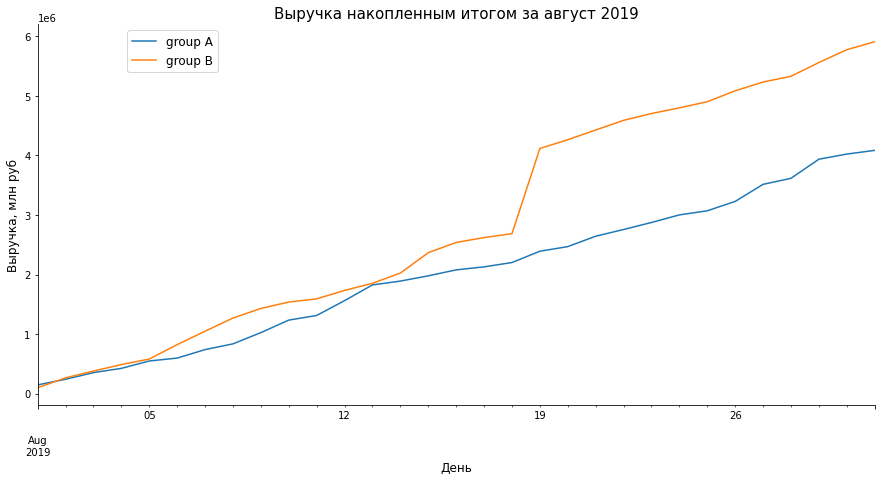

In [19]:
# Построим график кумулятивной выручки в разрезе по группам
ax = daily_A.plot(x='date', y='revenue_cum', label = 'group A', figsize=(15,7))
daily_B.plot(x='date', y='revenue_cum', ax=ax, label = 'group B')
plt.title('Выручка накопленным итогом за август 2019', fontsize=15)
plt.ylabel('Выручка, млн руб', fontsize=12)
plt.xlabel('День', fontsize=12)
plt.legend(bbox_to_anchor=(0.1, 1.0), loc='upper left', fontsize=12)
sns.despine();

**Выручка группы B стабильно лучше группы А** (хотя в период с 1го по 5 августа выручка обеих групп практически одинакова, также они практически сравнялись 13го августа).\
На графике мы видим **сильный скачок выручки группы B 19 августа, вероятно в этот день произошел какой-то большой заказ или большое количество заказов.** Мы рассмотрим аномалии ниже и удалим их из данных.

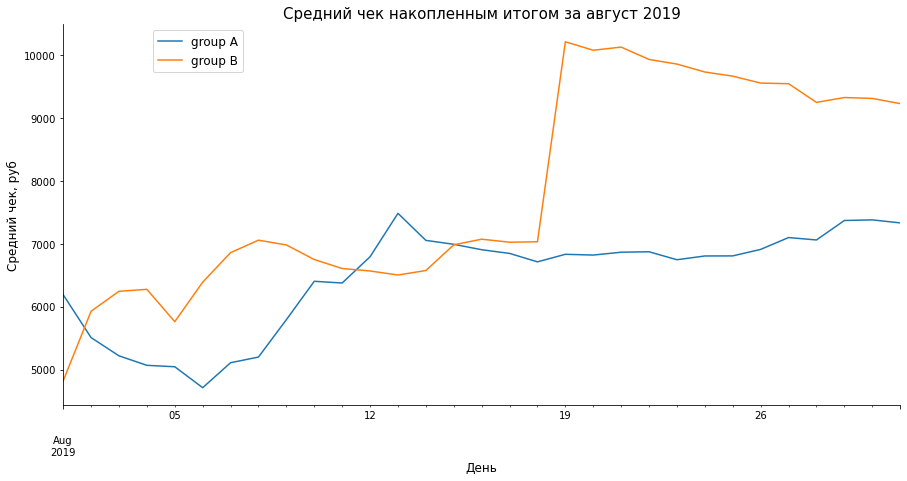

In [20]:
# Построим график кумулятивного среднего чека по группам
ax = daily_A.plot(x='date', y='avg_check_cum', label = 'group A', figsize=(15,7))
daily_B.plot(x='date', y='avg_check_cum', ax=ax, label = 'group B')

plt.title('Средний чек накопленным итогом за август 2019', fontsize=15)
plt.ylabel('Средний чек, руб', fontsize=12)
plt.xlabel('День', fontsize=12)
plt.legend(bbox_to_anchor=(0.1, 1.0), loc='upper left', fontsize=12)
sns.despine();

На графике со средним чеком мы также видим **резкий прирост среднего чека 19го августа, что также подтверждает, что в данных есть аномальные значения. За счет этого результаты группы B существенно выше.**

In [21]:
# Соберем данные в один датафрейм
daily_merged = daily_A.merge(daily_B, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

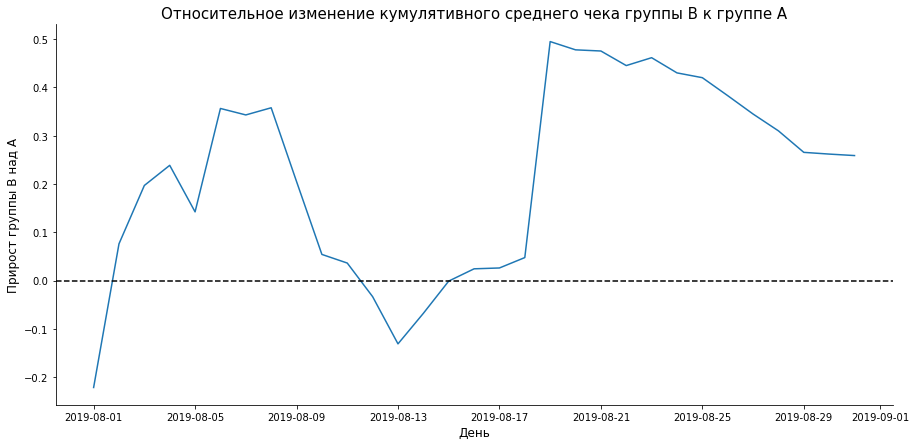

In [22]:
# Построим отношение средних чеков
plt.figure(figsize=(15,7))
plt.plot(daily_merged['date'], (daily_merged['avg_check_cum_B']/daily_merged['avg_check_cum_A']-1))

# Добавим пороговое значение 0
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А', fontsize=15)
plt.ylabel('Прирост группы В над А', fontsize=12)
plt.xlabel('День', fontsize=12)
sns.despine(); 

**Практически на протяжении всего периода наблюдения результаты группы B лучше группы А. Но возможно это за счет аномально крупного заказа, прошедшего 19го августа в группе B.**

In [23]:
# Создадим новые переменные с количеством посетителей сайта в день
visitors_A = visitors[visitors['group']=='A']
visitors_B = visitors[visitors['group']=='B']

In [24]:
# Добавим данные о посещении сайта (за день и накопленным итогом) в переменную группы А с основными показателями за день
daily_A = daily_A.merge(visitors_A, on = 'date', how='left')
daily_A = daily_A.rename(columns={'visitors':'visitors_day'})

# Посчитаем накопленный итог и среднее число заказов на посетителя
daily_A['visitors_cum'] = daily_A['visitors_day'].cumsum()
daily_A['orders_by_visitor_cum'] = daily_A['orders_cum']/daily_A['visitors_cum']

In [25]:
# Добавим данные о посещении сайта (за день и накопленным итогом) в переменную группы B с основными показателями за день
daily_B = daily_B.merge(visitors_B, on = 'date', how='left')
daily_B = daily_B.rename(columns={'visitors':'visitors_day'})

# Посчитаем накопленный итог и среднее число заказов на посетителя
daily_B['visitors_cum'] = daily_B['visitors_day'].cumsum()
daily_B['orders_by_visitor_cum'] = daily_B['orders_cum']/daily_A['visitors_cum']

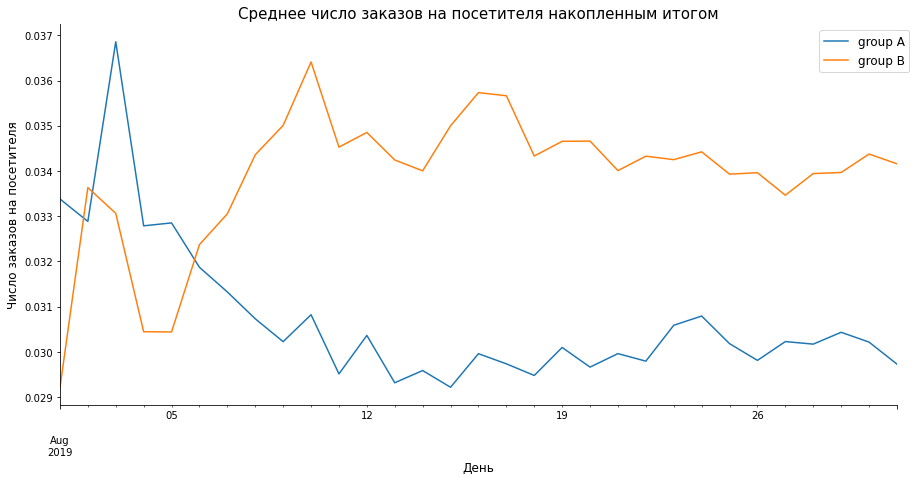

In [26]:
# Построим график кумулятивного среднего числа заказов по группам
ax = daily_A.plot(x='date', y='orders_by_visitor_cum', label = 'group A', figsize=(15,7))
daily_B.plot(x='date', y='orders_by_visitor_cum', ax=ax, label = 'group B')
plt.title('Среднее число заказов на посетителя накопленным итогом', fontsize=15)
plt.ylabel('Число заказов на посетителя', fontsize=12)
plt.xlabel('День', fontsize=12)
plt.legend(bbox_to_anchor=(0.9, 1.0), loc='upper left', fontsize=12)
sns.despine();

В период с 1 по 6 августа среднее число заказов на посетителя выше в группе А. При этом 3го августа число заказов в группе А достигло максимального значения и после начало снижаться, зафиксировавшись во 2ой половине месяца около 0,03.

**Среднее число заказов на посетителя в группе B, напротив, начиная с 6го августа выросло и во 2ой половине месяца практически зафиксировалось около уровня 0,034. Таким образом, по этому показателю результаты группы B также лучше группы А.**

In [27]:
# Соберем данные в одном датафрейме
daily_merged = daily_A.merge(daily_B, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

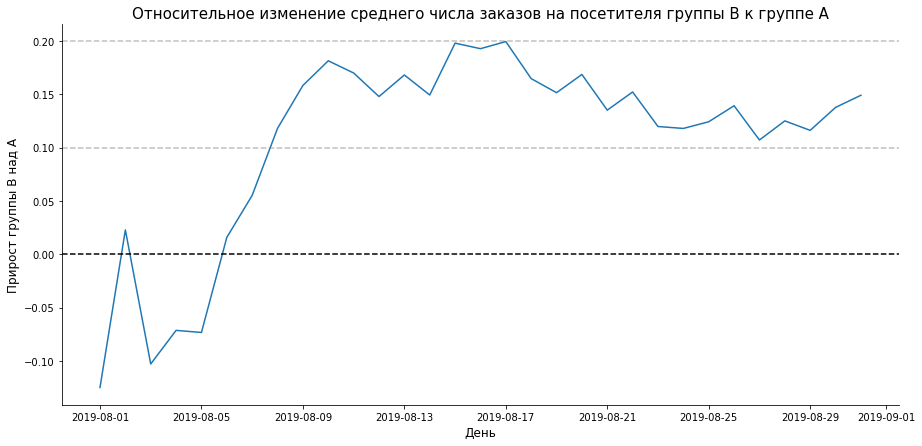

In [28]:
# Построим отношение среднего количества заказов на посетитлея
plt.figure(figsize=(15,7))
plt.plot(daily_merged['date'], (daily_merged['orders_by_visitor_cum_B']/daily_merged['orders_by_visitor_cum_A']-1))

# Добавим пороговое значение и оформление
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--', alpha=0.5)
plt.axhline(y=0.2, color='grey', linestyle='--', alpha=0.5)
plt.title('Относительное изменение среднего числа заказов на посетителя группы В к группе А', fontsize=15)
plt.ylabel('Прирост группы В над А', fontsize=12)
plt.xlabel('День', fontsize=12)
sns.despine(); 

На графике относительного различия мы видим, что **начиная с 6го августа и до конца всего периода наблюдений среднее число заказов на посетителя в группе B стабильно лучше группы А.\
К концу периода кумулятивное среднее количество заказов на посетителя в группе B на 15% выше результатов группы А.**

<a id="part5"></a>

### Анализ аномальных значений

Аномалии могут искажать результаты А/В теста. Ранее мы уже выявили, что как минимум 19 августа, вероятно прошел какой-то крупный заказ, который мог повлиять на результаты. Такой заказ появился скорее всего случайно, а не в результате тестирования гипотезы. 

Рассмотрим, сколько заказов в среднем совершает 1 пользователь и средний чек каждого заказа. 

In [29]:
# Рассчитаем число совершенных заказов для пользователей, которые сделали заказ хотя бы 1 раз
orders_by_user = (
                  orders.groupby('visitorId',as_index=False)[['visitorId','transactionId']]
                        .agg({'transactionId':pd.Series.nunique})
)

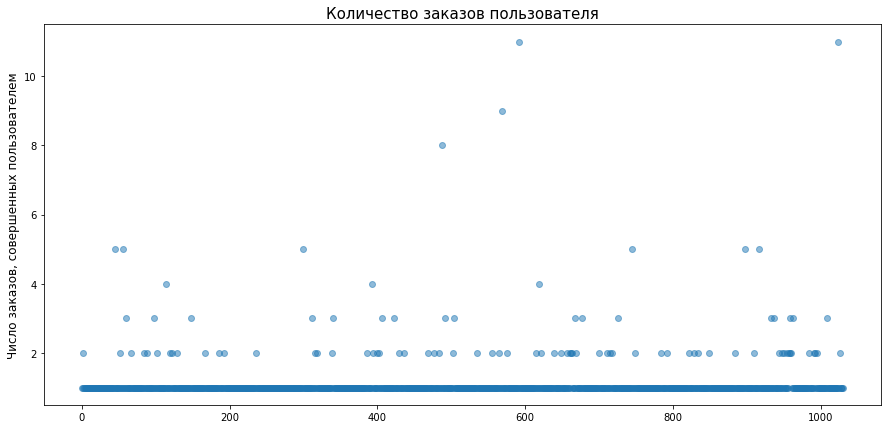

In [30]:
# Оценим кол-во совершенных заказов, построив scatter plot
x_values = pd.Series(range(0,len(orders_by_user['transactionId'])))

plt.figure(figsize=(15,7))
plt.title('Количество заказов пользователя', fontsize=15)
plt.ylabel('Число заказов, совершенных пользователем', fontsize=12)
plt.scatter(x_values, orders_by_user['transactionId'], alpha=0.5);

Для большинства клиентов, сделавших в августе хотя бы 1 заказ, этот заказ был единственным в этом месяце. 
Есть пользователи, совершившие 2-3 заказа, но не ясно - считать это аномалиями или нет, для этого ниже рассчитаем перцентили.  Несколько пользователей совершили более 4х заказов в месяц, эти значения скорее всего уже являются аномальными. 

In [31]:
# Рассчитаем перцентили количества заказов на одного пользователя
np.percentile(orders_by_user['transactionId'], [95, 99])

array([2., 4.])

**95% пользователей совершили в августе 1-2 заказа. 
И только 1% пользователей совершили более 4х заказов, это значение примем за верхнюю границу числа заказов и отсечем аномальных пользователей по ней.**

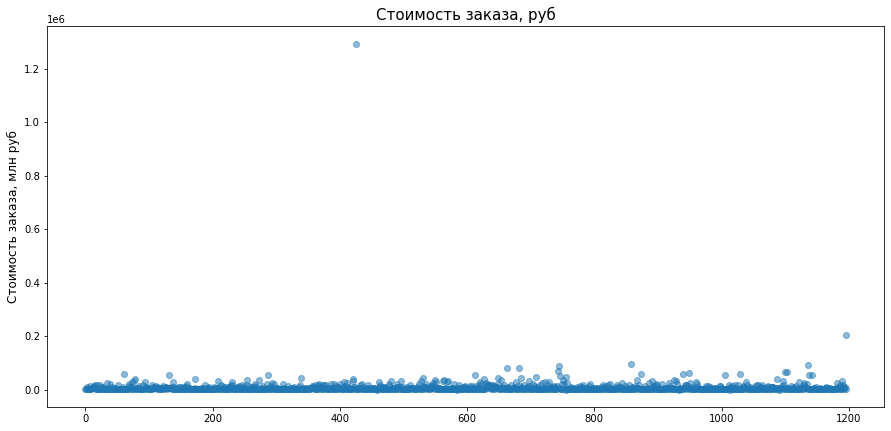

In [32]:
# Оценим стоимость каждого заказа, построив scatter plot
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,7))
plt.title('Стоимость заказа, руб', fontsize=15)
plt.ylabel('Стоимость заказа, млн руб', fontsize=12)
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Очевидно, что в данных есть как минимум 2 значения-выброса - заказы стоимостью 1,29 млн руб и 202,7 тыс руб. 
Остальные аномалии при таком масштабе графика не видно, поэтому обрежем ось y до 100 тыс.руб и рассмотрим данные подробнее.

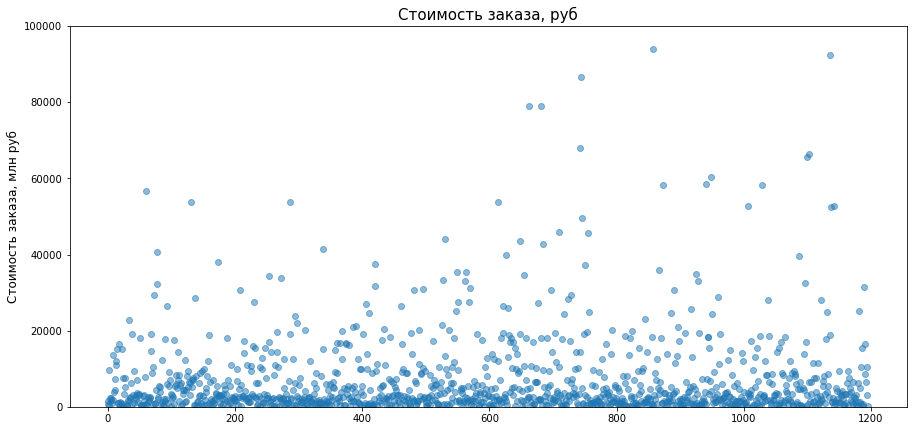

In [33]:
# Оценим стоимость каждого заказа, обрезав ось y до 100 тыс руб
plt.figure(figsize=(15,7))
plt.scatter(x_values, orders['revenue'], alpha=0.5);
plt.title('Стоимость заказа, руб', fontsize=15)
plt.ylabel('Стоимость заказа, млн руб', fontsize=12)
plt.ylim(0,100000);

**Стоимость большинства заказов не превышает 10 тыс руб. Дороже 40 тысяч заказы встречаются редко.**
Для определения границ аномальных значений рассчитаем перцентили. 

In [34]:
# Рассчитаем перцентили стоимостей заказа
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Стоимость заказа  95% покупателей не превышает 28 тыс руб. И только 1% совершили заказ стоимостью выше 58233 руб.
Примем значение 58,233 тыс. руб. в качестве верхней границы и по ней отсечем аномальных пользователей.**

<a id="part6"></a>

### Расчет статистической значимости между группами по "сырым" данным. 

Рассчитаем статистическую значимость различий в среднем числе заказов на посетителя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

#### Различия в среднем количестве заказов на посетителя между группами

Создадим переменные orders_by_visitor_A и orders_by_visitor_B. В них для пользователей, которые сделали заказ хотя бы 1 раз будет указано количество заказов. 

In [35]:
# Рассчитаем число совершенных заказов для пользователей, которые сделали заказ хотя бы 1 раз, в группе А
orders_by_visitor_A = (
                        orders[orders['group']=='A'].groupby('visitorId', as_index=False)
                                                    .agg({'transactionId':pd.Series.nunique})
)

orders_by_visitor_A.columns = ['visitor_id', 'orders']

In [36]:
# Рассчитаем число совершенных заказов для пользователей, которые сделали заказ хотя бы 1 раз, в группе В
orders_by_visitor_B = (
                        orders[orders['group']=='B'].groupby('visitorId', as_index=False)
                                                    .agg({'transactionId':pd.Series.nunique})
)

orders_by_visitor_B.columns = ['visitor_id', 'orders']

Создадим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. 

Количество нулей (пользователей, которые ничего не заказали) равно разнице между кол-вом посетителей и количеством записей о заказах

In [37]:
# Создадим выборку А, где каждый элемент — число заказов определённого пользователя, в том числе ноль
sample_A = (
              pd.concat([orders_by_visitor_A['orders'],
                         pd.Series(0, index=np.arange(visitors_A['visitors'].sum() 
                                    - len(orders_by_visitor_A['orders'])), name='orders')],axis=0)
)

In [38]:
# Создадим выборку В, где каждый элемент — число заказов определённого пользователя, в том числе ноль
sample_B = (
            pd.concat([orders_by_visitor_B['orders'],
                       pd.Series(0, index=np.arange(visitors_B['visitors'].sum() 
                                    - len(orders_by_visitor_B['orders'])), name='orders')],axis=0)
)

Посчитаем статистическую значимость различий в среднем числе заказов на посетителя по "сырым" данным.

**Нулевая гипотеза: различий в среднем количестве заказов между группами нет.\
Альтернативная: различия в среднем количестве заказов между группами есть.**

В качестве критического уровня статистической значимости возьмем 0.05

In [39]:
# Расчет статистической значимости

alpha = 0.05 # уровень значимости

# Применим критерий Манна-Уитни
p_value = (stats.mannwhitneyu(sample_A, sample_B)[1]).round(3)

# Выведем результат
print('p_value:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p_value: 0.017
Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп


In [40]:
# Выведем относительный прирост среднего числа заказов группы B
print('Преимущество группы B над А составляет',"{0:.3%}".format(sample_B.mean()/sample_A.mean()-1))

Преимущество группы B над А составляет 13.808%


**Вывод:**
**P-value составил 0.017, это меньше критического уровня значимости 0.05. Значит нулевую гипотезу можно отвергнуть.\
При этом относительные результаты группы B лучше на 13,8%.**

#### Различия в среднем чеке между группами

Теперь проверим статистическую значимость в среднем чеке.

**Нулевая гипотеза: различий в среднем чеке между группами нет.\
Альтернативная гипотеза: различия в среднем чеке между группами есть.**

In [41]:
# Расчет статистической значимости

alpha = 0.05 # уровень значимости

# Применим критерий Манна-Уитни
p_value = (stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]).round(3)

# Выведем результат
print('p_value:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p_value: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [42]:
# Выведем относительный прирост среднего чека группы B
print('Преимущество группы B над А составляет',"{0:.3%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Преимущество группы B над А составляет 25.871%


**Вывод: P-value значительно больше 0.05, значит, причин отвегать нулевую гипотезу нет, различий в среднем чеке по "сырым" данным между группами нет. Хотя средний чек группы B на 25,9% выше среднего чека группы А. Такая существенная относительная разница при отсутствии статистической значимости указывает на то, что в данных есть выбросы.** В следующем разделе мы рассчитаем статистическую значимость по "очищенным" данным, удалив аномальные значения, и посмотрим, как изменятся результаты. 

<a id="part7"></a>

### Расчет статистической значимости между группами по "очищенным" данным.

#### Различия в среднем количестве заказов на посетителя между группами

Уберем аномалии из данных (тех, кто совершил более 4 заказов или сделал заказ дороже 58000 руб) и рассчитаем статистическую значимость различий в среднем числе заказов на посетителя и среднем чеке между группами по «очищенным» данным.

In [43]:
# Отберем id посетителей, совершивших более 4 заказов
users_manyorders = (
                    pd.concat([orders_by_visitor_A[orders_by_visitor_A['orders']
                                                   >np.percentile(orders_by_user['transactionId'],99)]['visitor_id'],
                               
                               orders_by_visitor_B[orders_by_visitor_B['orders']
                                                   >np.percentile(orders_by_user['transactionId'],99)]['visitor_id']], axis=0)
)

In [44]:
# Отберем id посетителей, совершивших заказ более 58 тыс руб
user_expensiveorders = orders[orders['revenue']>np.percentile(orders['revenue'], 99)]['visitorId']

In [45]:
# Объединим переменные и удалим дубликаты
abnormal_users = pd.concat([users_manyorders,user_expensiveorders], axis=0).drop_duplicates().sort_values()
len(abnormal_users)

15

Таким образом, в наших данных присутствует всего 15 "аномальных" пользователей, совершивших более 4 заказов или сделавших заказ дороже 58 тыс руб. 

Создадим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Количество нулей (пользователей, которые ничего не заказали) равно разнице между кол-вом посетителей и количеством записей о заказах

In [46]:
# Подготовим выборку группы А для тестирования
sample_A = (pd.concat([orders_by_visitor_A[np.logical_not(orders_by_visitor_A['visitor_id'].isin(abnormal_users))]['orders'],
                       pd.Series(0, index=np.arange(visitors_A['visitors'].sum() 
                                    - len(orders_by_visitor_A['orders'])), name='orders')],axis=0)
)

In [47]:
sample_B = (
            pd.concat([orders_by_visitor_B[np.logical_not(orders_by_visitor_B['visitor_id'].isin(abnormal_users))]['orders'],
                       pd.Series(0, index=np.arange(visitors_B['visitors'].sum() 
                                 - len(orders_by_visitor_B['orders'])), name='orders')],axis=0)
)

In [48]:
# Расчет статистической значимости

alpha = 0.05 # уровень значимости

# Применим критерий Манна-Уитни
p_value = (stats.mannwhitneyu(sample_A, sample_B)[1]).round(3)

# Выведем результат
print('p_value:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p_value: 0.014
Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп


In [49]:
# Выведем относительный прирост среднего числа заказов группы B
print('Преимущество группы B над А составляет',"{0:.3%}".format(sample_B.mean()/sample_A.mean()-1))

Преимущество группы B над А составляет 15.331%


**Вывод: По "очищенным" данным p-value составил 0.014, это меньше критического уровня значимости 0.05. Значит нулевую гипотезу как по "сырым", так и по "очищенным" данным можно отвергнуть.\
При этом относительный прирост среднего числа заказов группы B лучше А на 15,3% (это даже выше, чем по "сырым" данным, где прирост группы В над А составлял 13,8%)**

#### Различия в среднем чеке между группами

Проверим, изменились ли результаты по среднему чеку. 

In [50]:
# Создадим выборку группы А без "аномальных" пользователей
sample_A = (
             orders[np.logical_and(orders['group']=='A', 
                                   np.logical_not(orders['visitorId'].isin(abnormal_users)))]
                                   ['revenue']
)

In [51]:
# Создадим выборку группы В без "аномальных" пользователей
sample_B = (
            orders[np.logical_and(orders['group']=='B', 
                                  np.logical_not(orders['visitorId'].isin(abnormal_users)))]
                                  ['revenue']
)

In [52]:
# Расчет статистической значимости

alpha = 0.05 # уровень значимости

# Применим критерий Манна-Уитни
p_value = (stats.mannwhitneyu(sample_A, sample_B)[1]).round(3)

# Выведем результат
print('p_value:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу, наблюдается статистически значимая разница между результатами групп')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p_value: 0.851
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [53]:
# Выведем относительный прирост среднего чека группы B
print('Преимущество группы B над А составляет',"{0:.3%}".format(sample_B.mean()/sample_A.mean()-1))

Преимущество группы B над А составляет -0.575%


**Вывод: P-value значительно больше 0.05, значит, причин отвегать нулевую гипотезу нет, различий в среднем чеке по-прежнему между группами нет. При этом мы видим, что средний чек групп А и В по "очищенным" данным действительно практически сравнялся, в то время как по "сырым" данным прирост среднего чека группы В составлял 25,9%.**

<a id="part8"></a>

### Выводы и рекомендации

**1. В данном проекте мы приоритизировали гипотезы отдела маркетинга интернет-магазина по увеличению выручки и проанализировали результаты проведенного А/В-теста.**

**2.** В первом мы изучили информацию о имеющихся данных и изменили тип данных в столбцах с датой в таблицах с заказами пользователей и посещаемостью сайта с object на datetime. Дубликаты в наших данных отсутствуют, но **система распределения пользователей по тестовым группам работает с ошибками - сразу 58 посетителей отнесены как в группу А, так и в группу B.** В данном проекте мы оставили распределение как есть, т.к. удаление такой ошибки в таком случае также нужно провести и в файле с посещениями сайта (а в нем данные сгруппированы по дням и id посетителей отсутствуют).

**3. Во втором разделе мы проверили приоритизацию гипотез методами ICE и RICE.** Отдел маркетинга предоставил 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort (для оценки каждого параметра применена 10-бальная шкала).\
**3.1. По методу ICE** наивысшие приоритеты у гипотезы 8 "Запустить акцию, дающую скидку на товар в день рождения" и гипотезы 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".** Данные гипотезы имеют самые высокие значения показателей влияния и уверенности (8-10 баллов), при этом затраты на их проверку средние (5-6 баллов).
**Однако приоритетизация гипотез способом ICE не учитывает такой важный показатель как охват пользователей, поэтому мы провели приоритизацию также с учетом охвата по методу RICE.**\
**3.2. С учетом охвата пользователей в первую очередь необходимо проверить гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", это внедрение затронет абсолютно всех пользователей и имеет сильное сильное влияние (7 баллов).** По методу ICE у данной гипотезы также был высокий приоритет (она входила в ТОП-3). 2ой приоритет у гипотезы 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". У данной гипотезы также высокий охват, при этом она достаточно проста в исполнении (Efforts - 3 балла).\
**3.3. Наименьшим приоритетом как по методу ICE, так и по методу RICE обладает гипотеза 4 "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".** Несмотря на низкие затраты для ее реализации, ожидается, что это изменение затронет не так много пользователей и мало окажет влияния на них.

**4. Анализ графиков кумулятивных метрик показал:**\
**4.1. Выручка группы B стабильно лучше группы А** (хотя в период с 1го по 5 августа выручка обеих групп практически одинакова, также они практически сравнялись 13го августа). Важно отметить сильный скачок выручки группы B 19 августа, т.к. в этот день произошел большой заказ в размере 1,3 млн руб.\
**4.2. Анализируя кумулятивный средний чек, мы также видим резкий прирост среднего чека 19го августа за счет совершения заказа в 1,3 млн.** За счет этого результаты группы B существенно выше и практически на протяжении всего периода наблюдения результаты группы B лучше группы А.\
**4.3.** В период с 1 по 6 августа конверсия из посещения сайта в заказ выше в группе А. При этом 3го августа конверсия в группе А достигла максимального значения и после начала снижаться, зафиксировавшись во 2ой половине месяца около 3%. Конверсия в группе B, напротив, начиная с 6го августа выросла и во 2ой половине месяца практически зафиксировалась около уровня 3,4%. Таким образом, **по показателю конверсии из посещения сайта в заказ результаты группы B также лучше группы А. К концу периода кумулятивная конверсия группы B на 15% выше результатов группы А.**


**5.  95% пользователей совершили в августе 1-2 заказа. И только 1% пользователей совершили более 4х заказов**. Это начение мы приняли за верхнюю границу числа заказов и отсекли по ней "аномальных" пользователей, совершивших более 4 заказов.\
**Стоимость заказа 95% покупателей не превышает 28 тыс руб. И только 1% совершили заказ стоимостью выше 58233 руб**, это значение мы приняли значение в качестве верхней границы и отсекли по ней "аномальных" пользователей. При этом в августе было совершено 2 особо дорогих заказа: стоимостью 1,29 млн руб и 202,7 тыс руб.

**6. Расчет статистической значимости показал:**

**6.1. И по "сырым", и по "очищенным" данным различия в среднем числе заказов на посетителей между группами есть.  При этом по "сырым" данным относительные результаты группы B над А лучше на 13,8%, а по "очищенным" на 15,3%.**

**6.2. Различия в среднем чеке между группами и по "сырым", и по "очищенным" данным отсутствуют. При этом по "очищенным" данным средний чек групп В на 0,6% ниже среднего чека группы А.** В то время как, по "сырым" данным средний чек группы В на 25,9% выше группы А за счет аномально большого заказа в 1,3 млн 19 августа. Убрав аномальный заказ, средние чеки групп практически сравнялись, а критерий Манна-Уитни, примененный в анализе результатов А/В-теста учел выбросы и показал один результат и в том, и в другом варианте.

**7. Результаты А/B-тестирования вполне однозначны. Можно остановить тест и зафиксировать победу группы В. Результаты группы В значительно лучше группы А по среднему количеству заказов посетителя, при этом по среднему чеку результаты групп примерно равны.**

**8. Полученные результаты теста действительно могут привести к росту выручки на 15% за счет роста количества заказов, совершаемых 1 посетителем, и сохранении среднего чека.**